# Stack Overflow Annual Developer Survey

This notebook covers the data analysis of the ataset containing responses to an annual survey conducted by StackOverflow. The datset can be found on this link : https://insights.stackoverflow.com/survey. 

The data set is the complete results of the 2022 Stack Overflow Developer Survey. Free response submissions and personally-identifying information have been removed from the results to protect the privacy of respondents. There are two files :

1. **survey_results_public.csv** - CSV file with main survey results, one respondent per row and one column per answer
2. **survey_results_schema.csv** - CSV file with survey schema, i.e., the questions that correspond to each column name

The survey was fielded from May 11, 2022 to June 1, 2022. The median time spent on the survey for qualified responses was 15.08 minutes.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

## 1. Importing libraries

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## 2. Loading data

In [165]:
survey_df = pd.read_csv('survey_results_public.csv')
schema_df = pd.read_csv('survey_results_schema.csv')

## 3. Data preparation and cleaning 

In [166]:
survey_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [167]:
 survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [168]:
schema_df.set_index('qname',inplace=True)

In [169]:
schema_df.drop(['qid','force_resp','type', 'selector'], axis=1, inplace=True)

In [170]:
schema_df = schema_df.question

In [171]:
survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [172]:
columns_of_interest = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # Programming experience,
    'CodingActivities',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith',
    # Employment
    'Employment',
    'RemoteWork',
    'DevType',
    'OrgSize',
]

In [173]:
survey_df = survey_df[columns_of_interest]

In [198]:
survey_df['Country'].value_counts().head(15)

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Switzerland                                               932
Name: Co

In [200]:
top_15_countries = survey_df['Country'].value_counts().head(15)
top_15_countries

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

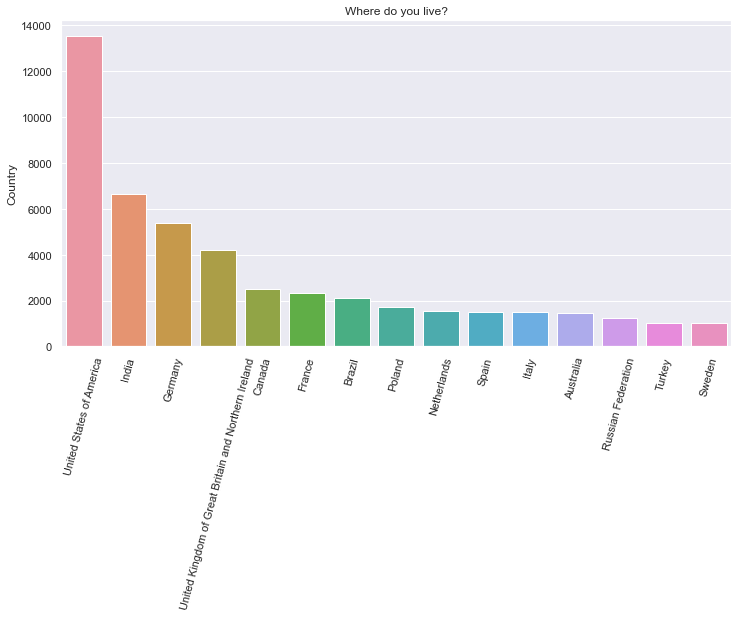

In [217]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_df['Country'][0:18])
sns.barplot(x= top_15_countries.index , y = top_15_countries)

In [226]:
survey_df.isna().sum()

Country                          1497
Age                              2322
Gender                           2415
EdLevel                          1697
CodingActivities                14369
YearsCode                        1937
YearsCodePro                    21435
LanguageHaveWorkedWith           2293
LanguageWantToWorkWith           6241
DatabaseHaveWorkedWith          13147
DatabaseWantToWorkWith          22254
PlatformHaveWorkedWith          23344
PlatformWantToWorkWith          32853
WebframeHaveWorkedWith          19724
WebframeWantToWorkWith          27146
NEWCollabToolsHaveWorkedWith     2921
NEWCollabToolsWantToWorkWith     9160
Employment                       1559
RemoteWork                      14310
DevType                         11966
OrgSize                         22229
dtype: int64

In [227]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Country                       71771 non-null  object
 1   Age                           70946 non-null  object
 2   Gender                        70853 non-null  object
 3   EdLevel                       71571 non-null  object
 4   CodingActivities              58899 non-null  object
 5   YearsCode                     71331 non-null  object
 6   YearsCodePro                  51833 non-null  object
 7   LanguageHaveWorkedWith        70975 non-null  object
 8   LanguageWantToWorkWith        67027 non-null  object
 9   DatabaseHaveWorkedWith        60121 non-null  object
 10  DatabaseWantToWorkWith        51014 non-null  object
 11  PlatformHaveWorkedWith        49924 non-null  object
 12  PlatformWantToWorkWith        40415 non-null  object
 13  WebframeHaveWork